In [1]:
!pip install -q -U --user lightgbm
!pip install -q --user  hypergbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [3]:
pd.set_option('display.max.columns',50)
pd.set_option('display.max.rows',50)

In [4]:
df_train= pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test= pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

df_train.shape,df_test.shape

((20758, 18), (13840, 17))

In [5]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
target = 'NObeyesdad'


# pre-training

In [7]:
from hypernets.core.search_space import Choice,Int
from hypergbm.search_space import GeneralSearchSpaceGenerator
from hypergbm import make_experiment

In [8]:
exp0 = make_experiment(df_train.copy(), target=target, 
                  reward_metric='accuracy', 
                  data_adaption=False,
                  max_trials=30,
                  random_state=123,
                 )
# est0 = exp0.run()

In [9]:
# from sklearn.metrics import classification_report

# X0 = df_train.copy()
# y0 = X0.pop(target)
# y_pred0 = est0.predict(X0)

# print(classification_report(y0, y_pred0, digits=5))

In [10]:
idx_ol = df_train[(df_train[target]=='Overweight_Level_I') | (df_train[target]=='Overweight_Level_II') ].index
df_ol = df_train.iloc[idx_ol,:]
df_ol.shape

(4949, 18)

In [11]:
# df_proba = pd.DataFrame(est0.predict_proba(df_test.copy()), columns = est0.classes_)
# df_proba.describe()

In [12]:
# dfs =[]
# for t in ['Overweight_Level_I','Overweight_Level_II']:
#     idx = df_proba[df_proba[t]>df_proba[t].quantile(0.96)].index
#     dft = df_test.iloc[idx,:]
#     dft[target] = t
#     dfs.append(dft)
# df_pseudo_labeled = pd.concat(dfs)

# df_pseudo_labeled[target].value_counts()


In [13]:
# df_train_w = pd.concat([df_train,df_ol,df_pseudo_labeled]).sample(frac=1.0,random_state=123).reset_index(drop=True)
df_train_w = pd.concat([df_train,df_ol]).sample(frac=1.0,random_state=123).reset_index(drop=True)

df_train_w.pop('id')
df_train_w

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,23.000000,1.710182,84.191125,yes,yes,2.141280,2.989112,Sometimes,no,2.519841,no,2.111370,0.018877,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,37.955371,1.560648,76.129784,yes,yes,2.918113,3.000000,Sometimes,no,1.459511,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
2,Female,17.992717,1.613669,50.000000,no,yes,1.123939,3.732126,Sometimes,no,2.000000,no,0.123987,0.378619,Sometimes,Public_Transportation,Insufficient_Weight
3,Male,30.000000,1.930000,102.000000,yes,yes,3.000000,3.000000,Sometimes,no,1.000000,no,2.000000,1.000000,no,Public_Transportation,Obesity_Type_II
4,Male,33.000000,1.740000,85.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25702,Male,18.000000,1.670000,70.000000,no,yes,3.000000,3.000000,Frequently,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
25703,Female,21.982942,1.731067,78.664618,yes,yes,2.000000,2.838388,Sometimes,no,2.774043,no,2.667739,0.808599,Sometimes,Public_Transportation,Overweight_Level_I
25704,Female,26.000000,1.611462,111.939671,yes,yes,3.000000,3.000000,Sometimes,no,2.609188,no,0.007050,0.228598,Sometimes,Public_Transportation,Obesity_Type_III
25705,Male,31.630054,1.835381,128.828122,yes,yes,2.880759,3.000000,Sometimes,no,2.471033,no,0.170480,0.000000,Sometimes,Public_Transportation,Obesity_Type_II


# training

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(25707, 16)","(25707,)",None,None,None,multiclass(7)


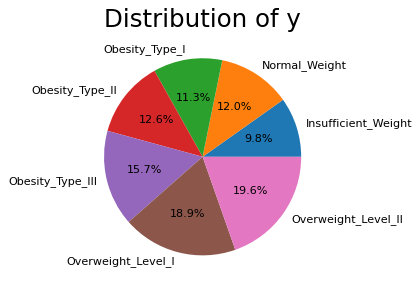

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Gender, Age, Height, Weight, family_history_w..."
1,selected_features,"[Gender, Age, Height, Weight, family_history_w..."
2,unselected_features,[]
3,X_train.shape,"(25707, 16)"
4,y_train.shape,"(25707,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,16/0


### Elapsed

* 0.209 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Experiment Settings:

HyperGBM(searcher=MCTSSearcher(space_fn=MySearchSpace(kwargs=None), optimize_direction='max'), callbacks=[EarlyStoppingCallback(mode='max', time_limit=7199.7898099422455), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], task='multiclass', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(25707, 16)","(25707,)",None,None,True,3,50,()


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,50,0.904073,38,[0.9308359590772941],609.269283,25,50


#### Best Trial:

key,value
signature,3120612a99692f2500bf72a0104cdda0
vectors,"[0, 1, 3, 10, 0, 405, 3, 2, 2, 2, 0]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,median
2-numeric_or_scaler_0.hp_or,3
3-Module_LightGBMEstimator_1.min_data_in_leaf,10
4-Module_LightGBMEstimator_1.boosting_type,gbdt
5-Module_LightGBMEstimator_1.num_leaves,405
6-Module_LightGBMEstimator_1.max_depth,10
7-Module_LightGBMEstimator_1.learning_rate,0.1


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,38,[0.9308359590772941],19.466113,"[0, 1, 3, 10, 0, 405, 3, 2, 2, 2, 0]"
1,26,[0.9280740654296495],14.374665,"[0, 1, 0, 20, 0, 335, 2, 3, 0, 3, 4]"
2,13,[0.9279184657875287],24.441762,"[0, 3, 0, 20, 1, 235, 2, 2, 2, 1, 2]"
3,47,[0.9250009724977633],13.174616,"[0, 3, 4, 10, 0, 95, 1, 3, 2, 1, 2]"
4,48,[0.9182323880655074],8.716590,"[1, 3, 4, 3, 2, 1, 0, 0, 0, 2]"


search:   0%|          | 0/50 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/3 [00:00<?, ?it/s]

### Fitted parameters

,key,value
0,input_features,"[Gender, Age, Height, Weight, family_history_w..."
1,best_reward,[0.9308359590772941]
2,history,"TrialHistory(direction='max', size=50, succeed..."


### Elapsed

* 609.361 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.5, 0.15, 0.3, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,scores,"[0.9308359590772941, 0.9320807562142607, 0.931..."
2,best_stack,"[0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 3, 0, 2, ..."
3,hits,"{0: 10, 2: 6, 1: 3, 3: 1}"
4,ensemble_size,20


### Elapsed

* 23.324 seconds

In [14]:
class MySearchSpace(GeneralSearchSpaceGenerator):
    def __init__(self, enable_lightgbm=True, enable_xgb=True, enable_catboost=False, enable_histgb=False,**kwargs): 
        super().__init__(enable_lightgbm=enable_lightgbm, 
                         enable_xgb=enable_xgb, 
                         enable_catboost=enable_catboost, 
                         enable_histgb=False,
                         **kwargs)

    @property
    def default_lightgbm_init_kwargs(self):
        return {
            'objective': 'multiclass',
            'num_class':7,
#             'n_estimators': Choice([100, 200, 300, 500]),
            'n_estimators': Choice([100, 200, 300]),
            'boosting_type': Choice(['gbdt', 'goss']), #'dart',
            'num_leaves': Int(15, 513, 5),
            'learning_rate': Choice([0.01, 0.03, 0.1, 0.3]), #[0.001, 0.01, 0.03, 0.5, 0.1]
#             'max_depth': Int(3,15,2), #Choice([3, 5, 7, 10]),
            'max_depth': Choice([3, 5, 7, 10]),
            'reg_alpha': Choice([0.001, 0.01, 0.1, 1, 10, 100]),
            'reg_lambda': Choice([0.001, 0.01, 0.1, 0.5, 1]),
#             'feature_fraction': Choice([0.8, 1.0]),
            'min_data_in_leaf': Int(10, 50, 10),
            'random_state': 335,
            'class_balancing': None,
        }

    @property
    def default_xgb_init_kwargs(self):
        return {
            'max_depth': Choice([3, 5, 7, 10]),
            'n_estimators': Choice([200, 300]),
            'learning_rate': Choice([0.001, 0.01, 0.5, 0.1]),
            'min_child_weight': Choice([1, 5, 10]),
            'gamma': Choice([0.5, 1, 1.5, 2, 5]),
            'reg_alpha': Choice([0.001, 0.01, 0.1, 1, 10, 100]),
            'reg_lambda': Choice([0.001, 0.01, 0.1, 0.5, 1]),
            'random_state': 335,
            'class_balancing': None,
        }

search_space = MySearchSpace()
exp = make_experiment(df_train_w.copy(),target=target, 
                  reward_metric='accuracy', 
                  data_adaption=False,
                  max_trials=50,
                  cv=True, num_folds=3,#5,
                  search_space=search_space,
                  searcher='mcts',
                  early_stopping_rounds=0,
                  early_stopping_time_limit=7200,
                  ensemble_size=20,
                  random_state=335,
                 )
est = exp.run()

In [15]:
df_t = exp.hyper_model_.history.to_df(True)
df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
df_t.sort_values('reward',ascending=False).head(30).T

,37,25,12,46,47,10,34,39,49,35,6,22,0,13,5,31,11,7,2,3,15,1,4,21,9,24,38,48,14,16
trial_no,38,26,13,47,48,11,35,40,50,36,7,23,1,14,6,32,12,8,3,4,16,2,5,22,10,25,39,49,15,17
succeeded,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False
reward,0.930836,0.928074,0.927918,0.925001,0.918232,0.917649,0.907302,0.905045,0.904073,0.89676,0.896254,0.891353,0.890808,0.886685,0.885284,0.884506,0.883884,0.882211,0.882133,0.87766,0.872019,0.847746,0.840822,0.839382,0.839188,0.0,0.0,0.0,0.0,0.0
elapsed,19.466113,14.374665,24.441762,13.174616,8.71659,34.088291,29.732071,8.473914,8.385401,10.5742,42.700926,14.583964,24.089266,15.58484,37.335304,6.509692,8.490406,12.102296,30.208512,36.488215,40.103788,5.491237,8.105662,32.026253,5.429034,4.26704,3.781556,3.445312,5.092097,4.469843
scores,{'accuracy': 0.9308359590772941},{'accuracy': 0.9280740654296495},{'accuracy': 0.9279184657875287},{'accuracy': 0.9250009724977633},{'accuracy': 0.9182323880655074},{'accuracy': 0.9176488894075544},{'accuracy': 0.9073015132065196},{'accuracy': 0.9050453183957677},{'accuracy': 0.9040728206325126},{'accuracy': 0.8967596374528338},{'accuracy': 0.8962539386159412},{'accuracy': 0.8913525498891353},{'accuracy': 0.8908079511417124},{'accuracy': 0.8866845606255106},{'accuracy': 0.8852841638464232},{'accuracy': 0.8845061656358191},{'accuracy': 0.8838837670673357},{'accuracy': 0.8822110709145369},{'accuracy': 0.8821332710934765},{'accuracy': 0.8776597813825028},{'accuracy': 0.872019294355623},{'accuracy': 0.8477457501847746},{'accuracy': 0.8408215661103979},{'accuracy': 0.8393822694207803},{'accuracy': 0.8391877698681293},NaN,NaN,NaN,NaN,NaN
oof,"[[0.0002992706624566721, 0.0004511933498810163...","[[0.00012431327538118698, 4.326424703924362e-0...","[[3.3868655527756915e-05, 1.6031882022559353e-...","[[3.4734237934201275e-05, 3.5466348785487746e-...","[[0.00032308692, 0.00465889, 0.55958074, 0.000...","[[0.000638513863655353, 0.0012361932647937067,...","[[0.0010124869862043022, 0.0009317892719054489...","[[0.0007511242, 0.0020710526, 0.4900015, 0.001...","[[0.0002998312, 0.000834449, 0.6895882, 0.0006...","[[0.0012757628834551289, 0.0014844908810006177...","[[0.0077554807367574, 0.009317371399519513, 0....","[[0.00767282243729784, 0.00971333197229265, 0....","[[0.002245946556151581, 0.004597090886159179, ...","[[0.0019003641, 0.009171725, 0.37633437, 0.003...","[[0.026954345, 0.02862772, 0.34799713, 0.02795...","[[0.0033727048, 0.009014033, 0.36269167, 0.004...","[[0.0016806605, 0.009863924, 0.20371346, 0.003...","[[0.006901500713846567, 0.00891644642319653, 0...","[[0.006828219575154935, 0.008921947857039259, ...","[[0.023399588, 0.025539441, 0.33205366, 0.0242...","[[0.12464078, 0.12515463, 0.15258355, 0.124720...","[[0.0100710355, 0.01865913, 0.19883141, 0.0109...","[[0.011022436266613108, 0.01991940412316834, 0...","[[0.028981928, 0.033696968, 0.12368226, 0.0301...","[[0.011327021, 0.022612879, 0.1513312, 0.01287...",NaN,NaN,NaN,NaN,NaN
oof_scores,"[{'accuracy': 0.9352316489672073}, {'accuracy'...","[{'accuracy': 0.9325475551406232}, {'accuracy'...","[{'accuracy': 0.9339479519197106}, {'accuracy'...","[{'accuracy': 0.928929863461314}, {'accuracy':...","[{'accuracy': 0.9225113782238301}, {'accuracy'...","[{'accuracy': 0.9201773835920177}, {'accuracy'...","[{'accuracy': 0.9099078072120435}, {'accuracy'...","[{'accuracy': 0.9082740109697748}, {'accuracy'...","[{'accuracy': 0.9067569144590968}, {'accuracy'...","[{'accuracy': 0.8973042362002568}, {'accuracy'...","[{'accuracy': 0.8982378340529816}, {'accuracy'...","[{'accuracy': 0.8927529466682227}, {'accuracy'...","[{'accuracy': 0.8928696463998133}, {'accuracy'...","[{'accuracy': 0.8863344614307387}, {'accuracy'...","[{'accuracy': 0.8875014587466449}, {'accuracy'...","[{'accuracy': 0.8834169681409733}, {'accuracy'...","[{'accuracy': 0.8859843622359669}, {'accuracy'...","[{'accuracy': 0.8854008635780137}, {'accuracy'...",

In [16]:
em = est.steps[-1][-1]
list(zip(em.weights_,em.estimators))

[(0.5,
  HyperGBMEstimator(task=multiclass, reward_metric=accuracy, cv=True,
  data_pipeline: DataFrameMapper(df_out=True,
                  df_out_dtype_transforms=[(ColumnSelector(include:['object']),
                                            'int')],
                  features=[(ColumnSelector(include:['object', 'category', 'bool']),
                             Pipeline(steps=[('categorical_imputer_0',
                                              SafeSimpleImputer(strategy='constant')),
                                             ('categorical_label_encoder_0',
                                              MultiLabelEncoder())])),
                            (ColumnSelector(include:number, exclude:timedelta),
                             Pipeline(steps=[('numeric_imputer_0',
                                              FloatOutputImputer(strategy='median')),
                                             ('numeric_minmax_scaler_0',
                                              M

# prediction

In [17]:
%%time
X_test = df_test.copy()
y_id = X_test.pop('id')
y_pred = est.predict(X_test)

df_sub = pd.DataFrame({'id': y_id, target:y_pred})
df_sub

CPU times: user 12.6 s, sys: 23.9 ms, total: 12.6 s
Wall time: 12.6 s


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [18]:
df_sub.to_csv('submission.csv', index=False)

In [19]:
1+1

2

In [20]:
from sklearn.metrics import classification_report

X1 = df_train.copy()
y1 = X1.pop(target)
y_pred1 = est.predict(X1)

print(classification_report(y1, y_pred1, digits=5))

                     precision    recall  f1-score   support

Insufficient_Weight    0.99207   0.99168   0.99187      2523
      Normal_Weight    0.98885   0.97859   0.98369      3082
     Obesity_Type_I    0.99826   0.98797   0.99309      2910
    Obesity_Type_II    1.00000   1.00000   1.00000      3248
   Obesity_Type_III    1.00000   1.00000   1.00000      4046
 Overweight_Level_I    0.97271   0.98393   0.97829      2427
Overweight_Level_II    0.97888   0.99247   0.98563      2522

           accuracy                        0.99133     20758
          macro avg    0.99011   0.99066   0.99037     20758
       weighted avg    0.99138   0.99133   0.99134     20758



In [21]:
1+1

2